# Feedforward Neural Network Implementation with Keras and TensorFlow: CIFAR-10 Dataset
This Jupyter notebook demonstrates the implementation of a feedforward neural network using Keras and TensorFlow. The goal of this assignment is to walk through the process of building, training, and evaluating a neural network for image classification. We will use the MNIST or CIFAR-10 dataset as per your choice.<br>
Dataset: https://www.cs.toronto.edu/%7Ekriz/cifar.html <br>
Info: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


## Assignment Steps:

**a. Import the necessary packages**: We will start by importing the required Python libraries, including Keras, TensorFlow, and other essential packages.

**b. Load the training and testing data**: In this step, we will load the dataset (either MNIST or CIFAR-10) for training and testing the neural network.

**c. Define the network architecture using Keras**: Here, we will define the architecture of our feedforward neural network, specifying the number of layers, neurons, and activation functions.

**d. Train the model using SGD (Stochastic Gradient Descent)**: We will use the Stochastic Gradient Descent optimizer to train the neural network on the training data.

**e. Evaluate the network**: After training, we will evaluate the performance of the model on the testing data to assess its accuracy and other relevant metrics.

**f. Plot the training loss and accuracy**: We will create plots to visualize the training loss and accuracy over epochs, providing insights into the model's learning progress.

Feel free to follow along with the code and explanations provided in this notebook to gain a better understanding of building and training neural networks for image classification.

# Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data<br>
b. Defining the model’s architecture<br>
c. Training the model<br>
d. Estimating the model’s performance<br>

Note: Both assignment can use this code accordingly

In [22]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [23]:
# !pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [24]:
# Define the paths to the training and testing data directories
# D:\Eng\B.E\DL\deepLearning\dataset\cifar-10-img\cifar-10-img\train
train_data_dir = r"C:\Users\Jayesh Mahajan\Downloads\cifar-10-img\cifar-10-img\train"
test_data_dir = r"C:\Users\Jayesh Mahajan\Downloads\cifar-10-img\cifar-10-img\test"

In [25]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 20000
test_batch_size = 2000

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during testing
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [26]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [28]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (20000, 32, 32, 3)
Shape of y_train (20000, 10)
Shape of x_test  (2000, 32, 32, 3)
Shape of y_test  (2000, 10)


In [29]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [30]:
x_train.shape[1:]

(32, 32, 3)

In [31]:
# Create a list of layers
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

C:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
from tensorflow.keras.optimizers import SGD
# Compile the model
sgd_optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train,
              batch_size=20,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 53s 49ms/step - accuracy: 0.3860 - loss: 1.6941 - val_accuracy: 0.4215 - val_loss: 1.5847
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.5185 - loss: 1.3422 - val_accuracy: 0.4935 - val_loss: 1.4233
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.5842 - loss: 1.1710 - val_accuracy: 0.5360 - val_loss: 1.2866
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.6356 - loss: 1.0360 - val_accuracy: 0.5650 - val_loss: 1.2600
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.6737 - loss: 0.9288 - val_accuracy: 0.6400 - val_loss: 0.9960
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7044 - loss: 0.8420 - val_accuracy: 0.6600 - val_loss: 0.9805
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.7325 - loss: 0.7602 - val_accuracy: 0.6630 - val_loss: 0.9576
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.7564 -

<Axes: >

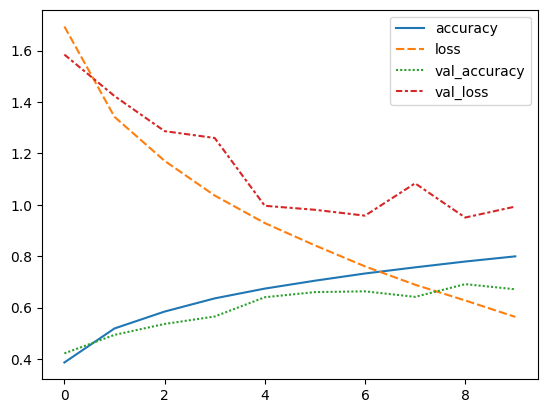

In [33]:
import seaborn as sns
sns.lineplot(model.history.history)

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6710 - loss: 0.9929
Loss:  0.9929385781288147
Accuracy:  0.6710000038146973


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


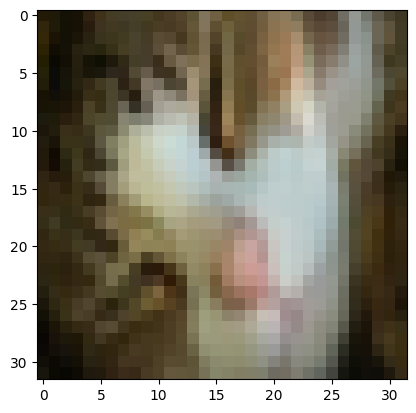

cat


In [35]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[50])
plt.show()
print(class_names[np.argmax(predicted_value[50], axis=0)])